This exercise was from a Coursera course on Matplotlib. The goal was to plot the extreme high and low temperatures over the span of 2005-2014 from a number of Detroit-area weather stations, and then identify and plot the 2015 temperatures that were outside of the range of temperatures for the previous 10 years. This also included a fun mapping exercise.

In [1]:
import folium
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime, timedelta

In [2]:
df = pd.read_csv('BinSize_d400.csv')
station_locations_by_hash = df[df['hash'] == 'fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89']

# get longitude and lattitude to plot
lons = station_locations_by_hash['LONGITUDE'].tolist()
lats = station_locations_by_hash['LATITUDE'].tolist()

# plot on a beautiful folium map
my_map = folium.Map(location = [lats[0], lons[0]], height = 500,  zoom_start = 9)
for lat, lon in zip(lats, lons):
    folium.Marker([lat, lon]).add_to(my_map)

# render map in Jupyter
display(my_map)

In [3]:
dft = pd.read_csv('fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv')
pd.set_option('display.max_rows',100)

In [4]:
dft['date_val'] = dft['Date'].astype('datetime64[ns]')

In [5]:
dft = dft.sort_values('date_val')

In [6]:
dft['calendar_day'] = dft['date_val'].dt.strftime('%m-%d')

In [7]:
dft['Data_Value'] = dft['Data_Value']/10
dft['month'] = dft['date_val'].dt.month
dft['day'] = dft['date_val'].dt.day
dft['year'] = dft['date_val'].dt.year

In [8]:
filt_feb29 = dft['date_val'].dt.month.eq(2) & dft['date_val'].dt.day.eq(29)
dft = dft.loc[~filt_feb29]

In [9]:
filtmax = (dft['Element'] == 'TMAX')

In [10]:
dft_max = dft.loc[filtmax]

In [11]:
filtmin = (dft['Element'] == 'TMIN')

In [12]:
dft_min = dft.loc[filtmin]

In [13]:
filt2015min = dft_min['date_val'].dt.year.eq(2015)
filt2015max = dft_max['date_val'].dt.year.eq(2015)
lows_2015 = dft_min.loc[filt2015min]
lows_pre2015 = dft_min.loc[~filt2015min]
highs_2015 = dft_max.loc[filt2015max]
highs_pre2015 = dft_max.loc[~filt2015max]

In [14]:
lows_pre2015.columns

Index(['ID', 'Date', 'Element', 'Data_Value', 'date_val', 'calendar_day',
       'month', 'day', 'year'],
      dtype='object')

In [15]:
lows_pre2015.set_index(['date_val'], inplace = True)
lows_2015.set_index(['date_val'], inplace = True)
highs_2015.set_index(['date_val'], inplace = True)
highs_pre2015.set_index(['date_val'], inplace = True)

In [16]:
highs_pre2015

,ID,Date,Element,Data_Value,calendar_day,month,day,year
date_val,,,,,,,,
2005-01-01,USC00207320,1/1/2005,TMAX,15.0,01-01,1,1,2005
2005-01-01,USW00014833,1/1/2005,TMAX,3.3,01-01,1,1,2005
2005-01-01,USW00004848,1/1/2005,TMAX,13.3,01-01,1,1,2005
2005-01-01,USC00205563,1/1/2005,TMAX,2.8,01-01,1,1,2005
2005-01-01,USW00014853,1/1/2005,TMAX,5.6,01-01,1,1,2005
...,...,...,...,...,...,...,...,...
2014-12-31,USC00200032,12/31/2014,TMAX,-5.6,12-31,12,31,2014
2014-12-31,USC00201502,12/31/2014,TMAX,-5.6,12-31,12,31,2014
2014-12-31,USC00200228,12/31/2014,TMAX,-3.9,12-31,12,31,2014


In [17]:
highs_pre2015.loc['2007']

,ID,Date,Element,Data_Value,calendar_day,month,day,year
date_val,,,,,,,,
2007-01-01,USW00004848,1/1/2007,TMAX,10.6,01-01,1,1,2007
2007-01-01,USC00207312,1/1/2007,TMAX,10.6,01-01,1,1,2007
2007-01-01,USC00205451,1/1/2007,TMAX,10.6,01-01,1,1,2007
2007-01-01,USW00094889,1/1/2007,TMAX,8.3,01-01,1,1,2007
2007-01-01,USC00200228,1/1/2007,TMAX,10.6,01-01,1,1,2007
...,...,...,...,...,...,...,...,...
2007-12-31,USC00205451,12/31/2007,TMAX,-1.7,12-31,12,31,2007
2007-12-31,USC00200228,12/31/2007,TMAX,-1.7,12-31,12,31,2007
2007-12-31,USC00208202,12/31/2007,TMAX,-1.7,12-31,12,31,2007


In [18]:
rec_highs_pre2015 = highs_pre2015.groupby('calendar_day')['Data_Value'].max()

In [19]:
rec_lows_pre2015 = lows_pre2015.groupby('calendar_day')['Data_Value'].min()

In [20]:
rec_highs_2015 = highs_2015.groupby('calendar_day')['Data_Value'].max()

In [21]:
rec_lows_2015 = lows_2015.groupby('calendar_day')['Data_Value'].min()

In [22]:
rec_lows_2015

calendar_day
01-01   -13.3
01-02   -12.2
01-03    -6.7
01-04    -8.8
01-05   -15.5
         ... 
12-27    -0.6
12-28    -3.9
12-29    -3.9
12-30    -2.2
12-31    -5.6
Name: Data_Value, Length: 365, dtype: float64

In [23]:
merged_temp_records = pd.merge(rec_highs_pre2015,rec_lows_pre2015, how = 'left', on = 'calendar_day')

In [24]:
merged_temp_records = pd.merge(merged_temp_records,rec_highs_2015, how = 'left', on = 'calendar_day')

In [25]:
merged_temp_records.rename(columns={'Data_Value_x': 'highT_pre2015', 'Data_Value_y': 'lowT_pre2015', 'Data_Value':'highT_2015'}, inplace = True)

In [26]:
merged_temp_records['lowT_2015'] = rec_lows_2015

In [27]:
merged_temp_records['date'] = pd.to_datetime(merged_temp_records.index, format = '%m-%d')

In [28]:
merged_temp_records['month'] = merged_temp_records['date'].dt.strftime('%b')

In [29]:
filtlow = (merged_temp_records['lowT_2015'] < merged_temp_records['lowT_pre2015'])
filthigh = (merged_temp_records['highT_2015'] > merged_temp_records['highT_pre2015'])
low2015 = merged_temp_records.loc[filtlow]
high2015 = merged_temp_records.loc[filthigh]
#(len(low2015), len(high2015))

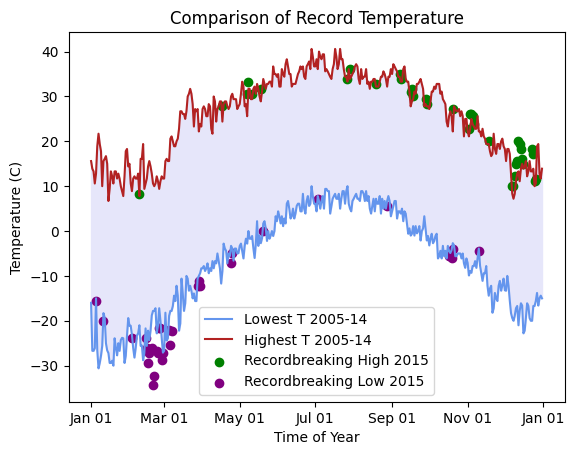

In [39]:
plt.plot(merged_temp_records['date'], merged_temp_records['lowT_pre2015'], color = 'cornflowerblue', label = 'Lowest T 2005-14')
plt.plot(merged_temp_records['date'], merged_temp_records['highT_pre2015'], color = 'firebrick', label = 'Highest T 2005-14')
plt.fill_between(merged_temp_records['date'], merged_temp_records['lowT_pre2015'], merged_temp_records['highT_pre2015'], color='lavender')
plt.scatter(high2015['date'], high2015['highT_2015'], color = 'green', label = 'Recordbreaking High 2015')
plt.scatter(low2015['date'], low2015['lowT_2015'], color = 'purple', label = 'Recordbreaking Low 2015')
plt.xlabel('Time of Year')
plt.ylabel('Temperature (C)')
plt.title('Comparison of Record Temperature')
date_format = mdates.DateFormatter('%b %d')
plt.gca().xaxis.set_major_formatter(date_format)
plt.legend()


In [31]:
merged_temp_records.head()

,highT_pre2015,lowT_pre2015,highT_2015,lowT_2015,date,month
calendar_day,,,,,,
01-01,15.6,-16.0,1.1,-13.3,1900-01-01,Jan
01-02,13.9,-26.7,3.9,-12.2,1900-01-02,Jan
01-03,13.3,-26.7,3.9,-6.7,1900-01-03,Jan
01-04,10.6,-26.1,4.4,-8.8,1900-01-04,Jan
01-05,12.8,-15.0,2.8,-15.5,1900-01-05,Jan
